In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import image

In [148]:
import sklearn

## First Project(Bank deposits)

In [149]:
bank_data=pd.read_csv(r"C:\Users\harsh\Downloads\credit_risk_dataset.csv")
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [150]:
import re

In [151]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [152]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [153]:
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [154]:
bank_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### In this bank data the target variable is  loan_status
### loan_status is discrete variable so we perform classification task

In [155]:
input_features=bank_data.drop("loan_status",axis=1)
output_feature=bank_data["loan_status"]

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_features, output_feature, train_size=0.80,stratify=bank_data['loan_status'], random_state=100)

In [157]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26064, 11) (26064,)
(6517, 11) (6517,)


In [158]:
y_train

31491    0
4473     0
14617    0
6625     0
16370    0
        ..
9704     1
28280    1
15905    0
28348    0
20372    0
Name: loan_status, Length: 26064, dtype: int64

In [159]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26064 entries, 31491 to 20372
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25361 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23581 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [160]:
x_train_cat=X_train.select_dtypes(include=['object'])
x_train_num=X_train.select_dtypes(include=['int64','float64'])

In [161]:
 from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_train_num=pd.DataFrame(imputer.fit_transform(x_train_num),columns=x_train_num.columns,index=x_train_num.index)

In [162]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26064 entries, 31491 to 20372
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  float64
 1   person_income               26064 non-null  float64
 2   person_emp_length           26064 non-null  float64
 3   loan_amnt                   26064 non-null  float64
 4   loan_int_rate               26064 non-null  float64
 5   loan_percent_income         26064 non-null  float64
 6   cb_person_cred_hist_length  26064 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [163]:
x=pd.concat([x_train_num,y_train],axis=1)

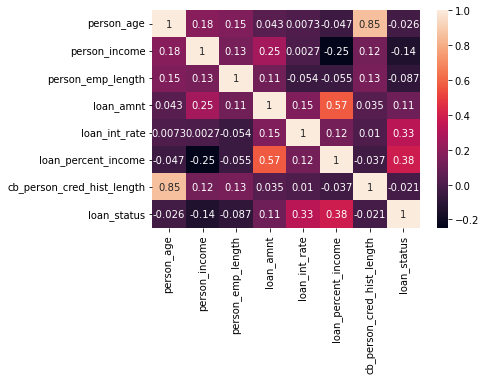

In [164]:
sns.heatmap(x.corr(), annot= True)
plt.show()

In [165]:
x_y=pd.concat([x,x_train_cat],axis=1)

In [166]:
from scipy import stats

def chisquaretest(data,col1,col2):
    cal,p_value,dof,exp=stats.chi2_contingency(pd.crosstab(data[col1],data[col2]))
    if p_value<0.05:
        return '{} and {} are dependent'.format(col1,col2)
    else:
        return '{} and {} are independent'.format(col1,col2)

for val in X_train.columns:
    print(chisquaretest(x_y,'loan_status',val))

loan_status and person_age are dependent
loan_status and person_income are dependent
loan_status and person_home_ownership are dependent
loan_status and person_emp_length are dependent
loan_status and loan_intent are dependent
loan_status and loan_grade are dependent
loan_status and loan_amnt are dependent
loan_status and loan_int_rate are dependent
loan_status and loan_percent_income are dependent
loan_status and cb_person_default_on_file are dependent
loan_status and cb_person_cred_hist_length are independent


In [167]:
# independent of  loan_status
x_train_num.drop("cb_person_cred_hist_length",axis=1,inplace=True)

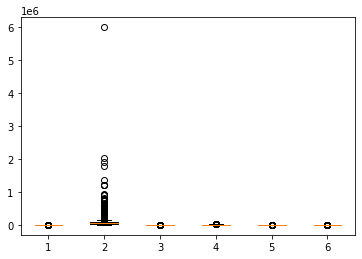

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.boxplot(x_train_num)
plt.show()

In [169]:
q1=x_train_num["person_income"].quantile(0.25)
q3=x_train_num["person_income"].quantile(0.75)
IQR=q3-q1
print("min_viscous_length",q1-1.5*IQR)
print("max_viscous_length",q3+1.5*IQR)

min_viscous_length -22451.0
max_viscous_length 140085.0


In [170]:
x_train_num[(x_train_num["person_income"]>140085.0) | (x_train_num["person_income"]<-22451.0)]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
29178,40.0,201400.0,2.0,12450.0,12.23,0.06
15886,26.0,201450.0,2.0,8000.0,16.95,0.03
15911,24.0,425000.0,8.0,10000.0,7.88,0.02
31792,36.0,144000.0,0.0,7600.0,15.23,0.05
16165,26.0,150000.0,3.0,25000.0,9.99,0.17
...,...,...,...,...,...,...
27810,35.0,234600.0,1.0,7500.0,15.05,0.03
32249,36.0,160000.0,20.0,24000.0,14.96,0.15
18106,30.0,168000.0,8.0,10000.0,8.94,0.06
28654,31.0,351699.0,7.0,10500.0,15.70,0.03


In [171]:
x_train_num["person_income"].max()

6000000.0

In [172]:
x_train_num[(x_train_num["person_income"]>500000)]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
29119,36.0,1200000.0,16.0,10000.0,6.540,0.01
28633,33.0,612000.0,3.0,5950.0,12.730,0.01
32291,42.0,600000.0,2.0,25000.0,14.740,0.04
31922,47.0,1362000.0,9.0,6600.0,7.740,0.00
32544,58.0,780000.0,7.0,4500.0,6.910,0.01
32300,51.0,667680.0,19.0,10000.0,13.980,0.01
21958,34.0,564000.0,2.0,6000.0,7.140,0.01
27798,32.0,572400.0,16.0,16000.0,9.760,0.03
32298,58.0,900000.0,18.0,19600.0,13.980,0.02
32546,60.0,1900000.0,5.0,1500.0,9.670,0.00


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_income', ylabel='Density'>

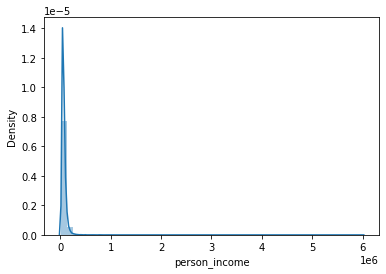

In [173]:
sns.distplot(X_train['person_income'],kde=True)

In [174]:
np.log(X_train['person_income'])

31491    11.034954
4473     10.616437
14617    11.608236
6625     10.819778
16370    10.714418
           ...    
9704      9.798127
28280    10.463103
15905    12.706848
28348    10.463103
20372    10.463103
Name: person_income, Length: 26064, dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_income', ylabel='Density'>

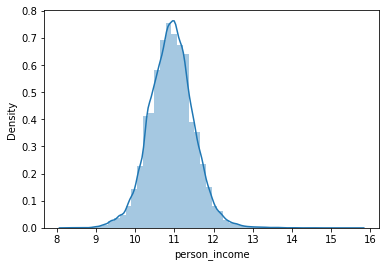

In [175]:
sns.distplot(np.log(X_train['person_income']),kde=True)

In [176]:
X_train['person_income']=np.log(X_train['person_income'])

In [177]:
x_train_num['person_income']=np.log(x_train_num['person_income'])

In [178]:
x_train_num[(x_train_num["person_income"]>14.0)]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
31922,47.0,14.124465,9.0,6600.0,7.74,0.00
32546,60.0,14.457364,5.0,1500.0,9.67,0.00
30049,42.0,14.528354,0.0,8450.0,12.29,0.00
32497,63.0,14.393247,13.0,12025.0,14.27,0.01
32297,144.0,15.607270,12.0,5000.0,12.73,0.00


In [180]:
x_train_num["person_age"].max()

144.0

In [181]:
x_train_num[x_train_num["person_age"]>100]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
81,144.0,12.429216,4.0,4800.0,13.570,0.02
183,144.0,12.206073,4.0,6000.0,11.860,0.03
747,123.0,11.264464,7.0,20000.0,13.294,0.26
575,123.0,11.289832,2.0,20400.0,10.250,0.25
32297,144.0,15.607270,12.0,5000.0,12.730,0.00


In [182]:
x_train_num.loc[x_train_num["person_income"]>15.0, "person_income"] = 14.0

In [183]:
x_train_num.loc[x_train_num["person_age"] >100.0, "person_age"] = 100.0

In [184]:
x_train_num["loan_int_rate"].max()

23.22

In [185]:
x_train_num.isnull().sum()

person_age             0
person_income          0
person_emp_length      0
loan_amnt              0
loan_int_rate          0
loan_percent_income    0
dtype: int64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

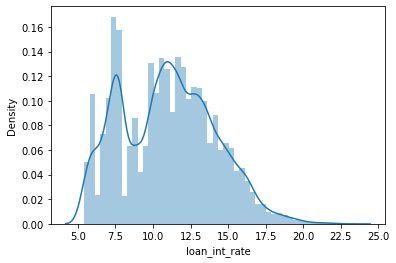

In [186]:
sns.distplot(x_train_num['loan_int_rate'],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x171d5b3e940>,
 'caps': [<matplotlib.lines.Line2D at 0x171d5b3eee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x171d5b3e760>],
 'medians': [<matplotlib.lines.Line2D at 0x171d5b8b4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x171d5b8b790>],
 'means': []}

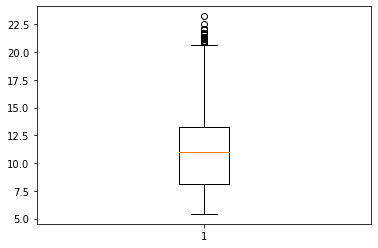

In [187]:
plt.boxplot(x_train_num["loan_int_rate"])

In [192]:
x_train_num[x_train_num["loan_int_rate"]>20.0]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
18376,29.0,10.985293,4.0,20000.0,20.17,0.34
26083,31.0,11.877569,0.0,13000.0,21.21,0.09
27368,28.0,11.719940,0.0,22000.0,20.86,0.18
24728,34.0,10.979343,7.0,12000.0,20.17,0.17
1827,24.0,10.308953,5.0,2000.0,21.27,0.07
...,...,...,...,...,...,...
27578,33.0,11.835009,18.0,25000.0,21.27,0.18
29277,38.0,11.326596,3.0,22250.0,23.22,0.27
26998,32.0,10.837225,6.0,15000.0,20.25,0.29
13133,23.0,11.248960,0.0,7200.0,20.89,0.09


In [193]:
x_train_num.loc[x_train_num["loan_int_rate"] >20.0, "loan_int_rate"] = 20.0

In [194]:
x_train_num["loan_int_rate"].isnull().sum()

0

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_percent_income', ylabel='Density'>

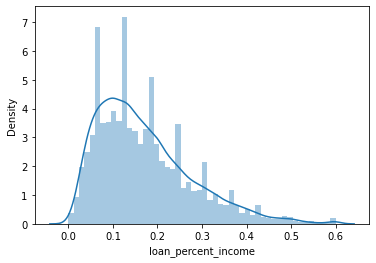

In [195]:
sns.distplot(x_train_num['loan_percent_income'],kde=True)

In [198]:
x_train_num.loc[x_train_num["loan_percent_income"] >0.6, "loan_percent_income"] = 0.6

In [199]:
x_train_num.isnull().sum()

person_age             0
person_income          0
person_emp_length      0
loan_amnt              0
loan_int_rate          0
loan_percent_income    0
dtype: int64

#### Rescaling numerical columns data using standardization

In [200]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [201]:
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                     columns = x_train_num.columns, 
                                    index = x_train_num.index)
x_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
31491,2.111462,0.193820,0.054110,0.701730,-0.673387,0.565806
4473,-0.276853,-0.547085,-0.433772,-0.330876,-1.000932,0.094455
14617,-0.276853,1.208706,-0.677713,-0.807464,1.234080,-1.225330
6625,-0.595295,-0.187108,0.785932,-1.045757,-1.071579,-1.036789
16370,-0.436074,-0.373629,-0.677713,0.241029,0.678538,0.754347


In [202]:
x_train_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04
mean,-1.581165e-16,7.454647e-16,-3.071004e-16,7.605948e-17,-3.122800e-16,-3.755266e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.232179e+00,-4.658433e+00,-1.165594e+00,-1.442914e+00,-1.790893e+00,-1.602411e+00
25%,-7.545160e-01,-6.498052e-01,-6.777127e-01,-7.280323e-01,-9.126235e-01,-7.539780e-01
50%,-2.768530e-01,-1.837971e-02,-1.898310e-01,-2.514447e-01,-2.241475e-03,-1.883562e-01
75%,3.600311e-01,6.256759e-01,5.419916e-01,4.197495e-01,7.138615e-01,5.658063e-01
max,1.150550e+01,6.378224e+00,2.883913e+01,4.037844e+00,2.891071e+00,4.053808e+00


#### Rescaling categorical using label encoding/one-hot encoding

- loan_grade data is ordinal data so we have to use label encoding for that column
- for remaining categorical columns we just apply one hot encoding

In [203]:
x_train_cat.head(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
31491,RENT,HOMEIMPROVEMENT,A,N
4473,MORTGAGE,PERSONAL,A,N
14617,MORTGAGE,VENTURE,D,N
6625,MORTGAGE,EDUCATION,A,N
16370,RENT,PERSONAL,C,N


In [204]:
x_train_cat['loan_grade'].unique()

array(['A', 'D', 'C', 'B', 'E', 'F', 'G'], dtype=object)

In [205]:
# label encoding technique
loan_grade_col = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5,'F': 6,'G' : 7}

x_train_cat['loan_grade'] = x_train_cat['loan_grade'].apply(lambda x : loan_grade_col[x])

x_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
31491,RENT,HOMEIMPROVEMENT,1,N
4473,MORTGAGE,PERSONAL,1,N
14617,MORTGAGE,VENTURE,4,N
6625,MORTGAGE,EDUCATION,1,N
16370,RENT,PERSONAL,3,N


In [206]:
x_train_cat['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [207]:
x_train_cat['loan_intent'].unique()

array(['HOMEIMPROVEMENT', 'PERSONAL', 'VENTURE', 'EDUCATION',
       'DEBTCONSOLIDATION', 'MEDICAL'], dtype=object)

In [208]:
x_train_cat['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [209]:
x_train_cat_le=pd.DataFrame(x_train_cat['loan_grade'])

In [210]:
x_train_cat_oe=x_train_cat.drop('loan_grade',axis=1)
x_train_cat_oe.head(3)

,person_home_ownership,loan_intent,cb_person_default_on_file
31491,RENT,HOMEIMPROVEMENT,N
4473,MORTGAGE,PERSONAL,N
14617,MORTGAGE,VENTURE,N


In [211]:
x_train_cat_oe['person_home_ownership'].value_counts()

RENT        13204
MORTGAGE    10753
OWN          2027
OTHER          80
Name: person_home_ownership, dtype: int64

In [212]:
x_train_cat_oe['loan_intent'].value_counts()

EDUCATION            5142
MEDICAL              4873
VENTURE              4589
PERSONAL             4380
DEBTCONSOLIDATION    4214
HOMEIMPROVEMENT      2866
Name: loan_intent, dtype: int64

In [213]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',min_frequency=4000, sparse=False)
encoder.fit(x_train_cat_oe)
x_train_cat_ohe = pd.DataFrame(encoder.transform(x_train_cat_oe), 
                               columns=encoder.get_feature_names_out(x_train_cat_oe.columns), 
                               index = x_train_cat.index)

x_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
31491,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14617,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16370,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [214]:
type(x_train_cat_le)

pandas.core.frame.DataFrame

In [215]:
x_train_cat_le

,loan_grade
31491,1
4473,1
14617,4
6625,1
16370,3
...,...
9704,3
28280,2
15905,2
28348,1


In [216]:
x_train_cat_le

,loan_grade
31491,1
4473,1
14617,4
6625,1
16370,3
...,...
9704,3
28280,2
15905,2
28348,1


In [217]:
x_train_cat_rescaled=pd.concat([x_train_cat_le, x_train_cat_ohe], axis=1)
x_train_cat_rescaled

,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
31491,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4473,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14617,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6625,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16370,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9704,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28280,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15905,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28348,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [218]:
x_train_transformed=pd.concat([x_train_num_rescaled, x_train_cat_rescaled], axis=1)
x_train_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
31491,2.111462,0.193820,0.054110,0.701730,-0.673387,0.565806,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4473,-0.276853,-0.547085,-0.433772,-0.330876,-1.000932,0.094455,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14617,-0.276853,1.208706,-0.677713,-0.807464,1.234080,-1.225330,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6625,-0.595295,-0.187108,0.785932,-1.045757,-1.071579,-1.036789,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16370,-0.436074,-0.373629,-0.677713,0.241029,0.678538,0.754347,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,-0.276853,-1.995749,-0.677713,-0.172013,1.051040,2.828294,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28280,0.996915,-0.818534,-0.677713,0.860593,-0.002241,2.451213,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15905,-0.595295,3.153591,0.054110,-0.966326,-0.204549,-1.508141,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28348,0.837694,-0.818534,-0.677713,-0.569170,-1.790893,0.000184,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Rescaling numerical test data using standardization

In [288]:
x_test_cat=X_test.select_dtypes(include=['object'])
x_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10072,RENT,MEDICAL,D,N
24868,OWN,EDUCATION,A,N
24686,MORTGAGE,PERSONAL,A,N
10063,RENT,EDUCATION,B,N
18062,RENT,PERSONAL,A,N
...,...,...,...,...
16652,MORTGAGE,VENTURE,A,N
14755,MORTGAGE,PERSONAL,A,N
29843,RENT,PERSONAL,C,Y
2,MORTGAGE,MEDICAL,C,N


In [220]:
x_test_num=X_test.select_dtypes(include=['int64','float64'])
x_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10072,26,34200,9.0,9450,15.62,0.28,3
24868,28,77500,3.0,8000,8.49,0.10,7
24686,30,75000,12.0,8000,7.14,0.11,9
10063,23,50400,5.0,9400,9.99,0.19,4
18062,32,189996,4.0,8400,9.32,0.04,8
...,...,...,...,...,...,...,...
16652,22,49000,6.0,2400,5.79,0.05,3
14755,26,114000,10.0,14400,7.14,0.13,2
29843,40,28800,3.0,4200,14.72,0.15,16
2,25,9600,1.0,5500,12.87,0.57,3


In [221]:
X_test.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             192
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 633
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [278]:
X_test["loan_int_rate"].max()

21.36

In [222]:
 from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_test_num=pd.DataFrame(imputer.fit_transform(x_test_num),columns=x_test_num.columns,index=x_test_num.index)

In [223]:
x_test_num.isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [224]:
x_test_num.drop("cb_person_cred_hist_length",axis=1,inplace=True)

In [279]:
x_test_num['person_income']=np.log(x_test_num['person_income'])

In [280]:
x_test_num.loc[x_test_num["person_income"]>15.0, "person_income"] = 14.0

In [281]:
x_test_num.loc[x_test_num["person_age"] >100.0, "person_age"] = 100.0

In [282]:
x_test_num.loc[x_test_num["loan_int_rate"] >20.0, "loan_int_rate"] = 20.0

In [283]:
x_test_num.loc[x_test_num["loan_percent_income"] >0.6, "loan_percent_income"] = 0.6

In [284]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                     columns = x_test_num.columns, 
                                    index = x_test_num.index)
x_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
10072,-0.276853,-0.859468,1.029873,-0.021094,1.484555,1.037158
24868,0.041589,0.588739,-0.433772,-0.251445,-0.805047,-0.659708
24686,0.360031,0.530691,1.761696,-0.251445,-1.238563,-0.565437
10063,-0.754516,-0.173002,0.054110,-0.029037,-0.323364,0.188725
18062,0.678473,2.176221,-0.189831,-0.187900,-0.538516,-1.225330


#### Rescaling categorical columns using onehot/label encoding

In [289]:
loan_grade_col = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5,'F': 6,'G' : 7}

x_test_cat['loan_grade'] = x_test_cat['loan_grade'].apply(lambda x : loan_grade_col[x])

x_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10072,RENT,MEDICAL,4,N
24868,OWN,EDUCATION,1,N
24686,MORTGAGE,PERSONAL,1,N
10063,RENT,EDUCATION,2,N
18062,RENT,PERSONAL,1,N


In [290]:
x_test_cat_le=pd.DataFrame(x_test_cat['loan_grade'])

In [291]:
x_test_cat_oe=x_test_cat.drop('loan_grade',axis=1)
x_test_cat_oe.head(3)

,person_home_ownership,loan_intent,cb_person_default_on_file
10072,RENT,MEDICAL,N
24868,OWN,EDUCATION,N
24686,MORTGAGE,PERSONAL,N


In [292]:
x_test_cat_oe['person_home_ownership'].value_counts()

RENT        3242
MORTGAGE    2691
OWN          557
OTHER         27
Name: person_home_ownership, dtype: int64

In [293]:
x_test_cat_oe['loan_intent'].value_counts()

EDUCATION            1311
MEDICAL              1198
PERSONAL             1141
VENTURE              1130
DEBTCONSOLIDATION     998
HOMEIMPROVEMENT       739
Name: loan_intent, dtype: int64

In [294]:
from sklearn.preprocessing import OneHotEncoder

x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat_oe), 
                               columns=encoder.get_feature_names_out(x_test_cat_oe.columns), 
                               index = x_test_cat_oe.index)

x_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
10072,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24868,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
24686,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10063,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18062,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [295]:
x_test_cat_rescaled=pd.concat([x_test_cat_le, x_test_cat_ohe], axis=1)
x_test_cat_rescaled.head(3)

,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
10072,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24868,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
24686,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [296]:
x_test_transformed=pd.concat([x_test_num_rescaled, x_test_cat_rescaled], axis=1)
x_test_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_intent_infrequent_sklearn,cb_person_default_on_file_Y
10072,-0.276853,-0.859468,1.029873,-0.021094,1.484555,1.037158,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24868,0.041589,0.588739,-0.433772,-0.251445,-0.805047,-0.659708,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
24686,0.360031,0.530691,1.761696,-0.251445,-1.238563,-0.565437,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10063,-0.754516,-0.173002,0.054110,-0.029037,-0.323364,0.188725,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18062,0.678473,2.176221,-0.189831,-0.187900,-0.538516,-1.225330,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16652,-0.913737,-0.222873,0.298051,-1.141075,-1.672078,-1.131059,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14755,-0.276853,1.271938,1.273814,0.765275,-1.238563,-0.376897,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29843,1.952241,-1.163696,-0.433772,-0.855122,1.195545,-0.188356,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.436074,-3.108581,-0.921654,-0.648601,0.601469,3.770997,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [297]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train_transformed, y_train)

In [298]:
X_res.shape

(40756, 15)

In [299]:
y_res.shape

(40756,)

## Algorithms

### decision Tree Algorithm

In [300]:
x_train_transformed.isnull().sum()

person_age                                  0
person_income                               0
person_emp_length                           0
loan_amnt                                   0
loan_int_rate                               0
loan_percent_income                         0
loan_grade                                  0
person_home_ownership_RENT                  0
person_home_ownership_infrequent_sklearn    0
loan_intent_EDUCATION                       0
loan_intent_MEDICAL                         0
loan_intent_PERSONAL                        0
loan_intent_VENTURE                         0
loan_intent_infrequent_sklearn              0
cb_person_default_on_file_Y                 0
dtype: int64

In [264]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_res,y_res)
y_train_pred=d.predict(X_res)
y_pred=d.predict(x_test_transformed)
from sklearn import metrics
print(metrics.accuracy_score(y_res,y_train_pred))
print(metrics.accuracy_score(y_test,y_pred))

1.0
0.8490102808040509


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

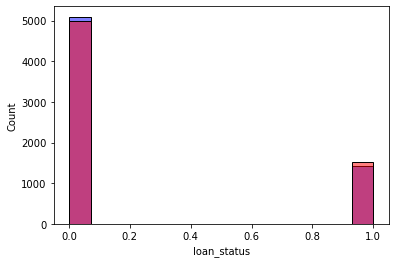

In [265]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)

### Random forest 

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_res,y_res)
y_pred=rf.predict(x_test_transformed)
y_train_pred=rf.predict(X_res)
print(metrics.accuracy_score(y_res,y_train_pred))
print(metrics.accuracy_score(y_test,y_pred))

0.9999754637354009
0.9151450053705693


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

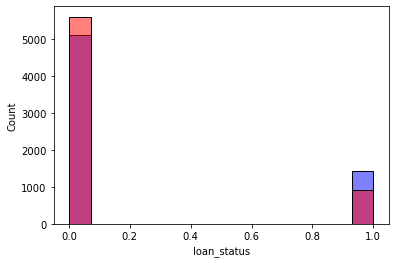

In [268]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)

### Using MLP(Multi layer Perceptron)

In [301]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project_',
    project_name='bankData')

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(x_train_transformed, y_train,
             epochs=50,
             validation_split=0.2)

In [ ]:
tuner.results_summary()

In [302]:
model_=Sequential()
model_.add(Dense(30,activation="relu",input_dim=15, kernel_initializer='he_uniform'))
model_.add(Dense(22,activation="relu", kernel_initializer='he_normal'))
model_.add(Dense(19,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(11,activation="relu", kernel_initializer='glorot_uniform'))
model_.add(Dense(9,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(8,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(4,activation="relu", kernel_initializer='he_uniform'))
model_.add(BatchNormalization())
model_.add(Dense(1,activation="sigmoid"))

In [303]:
model_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [304]:
save=model_.fit(x_train_transformed,y_train,batch_size=10,epochs=50,verbose=1,validation_split =0.2)

Epoch 1/50
2086/2086 [==============================] - 3s 1ms/step - loss: 0.3899 - accuracy: 0.8367 - val_loss: 0.3371 - val_accuracy: 0.8605
Epoch 2/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.3265 - accuracy: 0.8740 - val_loss: 0.3112 - val_accuracy: 0.8866
Epoch 3/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.3141 - accuracy: 0.8820 - val_loss: 0.2945 - val_accuracy: 0.8884
Epoch 4/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.3004 - accuracy: 0.8907 - val_loss: 0.2800 - val_accuracy: 0.9018
Epoch 5/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.8952 - val_loss: 0.2824 - val_accuracy: 0.9052
Epoch 6/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.2893 - accuracy: 0.9003 - val_loss: 0.2926 - val_accuracy: 0.8910
Epoch 7/50
2086/2086 [==============================] - 2s 1ms/step - loss: 0.2817 - accuracy: 0.9039 - val_loss: 0.2691 - val_accuracy:

In [305]:
test_pred=model_.predict(x_test_transformed)

204/204 [==============================] - 0s 632us/step


In [306]:
test_pred=np.ravel(np.where(test_pred<0.5,0,1))
test_pred=pd.Series(test_pred)
test_pred.index=y_test.index
test_pred

10072    1
24868    0
24686    0
10063    0
18062    0
        ..
16652    0
14755    0
29843    0
2        1
214      1
Length: 6517, dtype: int32

In [307]:
from sklearn import metrics
metrics.accuracy_score(y_test,test_pred)

0.9208224643240754

In [308]:
train_pred=model_.predict(x_train_transformed)

815/815 [==============================] - 1s 591us/step


In [309]:
train_pred=np.ravel(np.where(train_pred<0.5,0,1))
train_pred=pd.Series(train_pred)
train_pred.index=y_train.index
train_pred

31491    0
4473     0
14617    0
6625     0
16370    0
        ..
9704     1
28280    1
15905    0
28348    0
20372    0
Length: 26064, dtype: int32

In [310]:
from sklearn import metrics
metrics.accuracy_score(y_train,train_pred)

0.930133517495396

In [311]:
train_loss=save.history['loss']
cv_loss=save.history['val_loss']

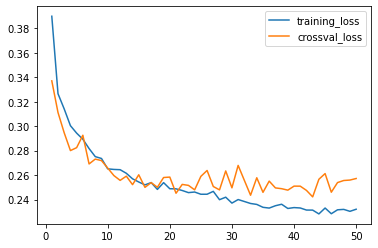

In [312]:
plt.plot(range(1,51),train_loss,label="training_loss")
plt.plot(range(1,51),cv_loss,label="crossval_loss")
plt.legend()